In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
dataset1 = pd.read_csv('DL-1.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [59]:
# Name: G.TEJASWINI
# Register Number: 212222230157
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        class NeuralNet(nn.Module):
          self.fc1 = nn. Linear (1, 3)
          self.fc2 = nn. Linear (3, 2)
          self.fc3 = nn. Linear (2, 1)
          self.relu = nn. ReLU()
          self.history = {'loss': []}
  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self. fc3(x)
    return x

In [60]:
ai_brain = NeuralNet ()
criterion = nn. MSELoss ()
optimizer = optim.RMSprop (ai_brain. parameters(), lr=0.001)

In [61]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000) :
  for epoch in range (epochs) :
    optimizer. zero_grad()
    loss = criterion(ai_brain(X_train), y_train)
    loss. backward()
    optimizer.step()
    ai_brain. history['loss'] .append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [62]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 684.485718
Epoch [200/2000], Loss: 624.842346
Epoch [400/2000], Loss: 555.417664
Epoch [600/2000], Loss: 467.304688
Epoch [800/2000], Loss: 365.791534
Epoch [1000/2000], Loss: 260.090698
Epoch [1200/2000], Loss: 162.889832
Epoch [1400/2000], Loss: 88.793373
Epoch [1600/2000], Loss: 49.086647
Epoch [1800/2000], Loss: 38.009792


In [63]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 39.655285


In [64]:
loss_df = pd.DataFrame(ai_brain.history)

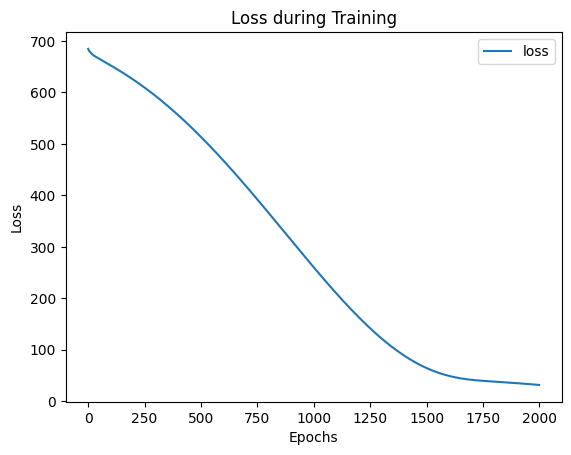

In [65]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [67]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 23.883686065673828
